In [8]:
import numpy as np 
import pandas as pd 
import os
path="flowers"
os.listdir(path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
path='flowers'
os.listdir(path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

 # Data oluşturma 

In [11]:
classes=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

label_of_file=[]
img_list=[]
    
for kind in classes:
    kind_parh=os.path.join(path,kind)
    
    for img in os.listdir(kind_parh):
        img_list.append(os.path.join(kind_parh,img))
        label_of_file.append(kind)

df=pd.DataFrame({'img':img_list,'label':label_of_file})
df.head(3)
df = df.sample(frac=1).reset_index(drop=True)  # yerleridegistirelim
df.head(2)

,img,label
0,flowers\daisy\7630520686_e3a61ac763.jpg,daisy
1,flowers\daisy\4544110929_a7de65d65f_n.jpg,daisy


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Etiketleri sayısal değerlere dönüştür
df['encode_label'] = encoder.fit_transform(df['label'])

In [13]:
df.head(10)

,img,label,encode_label
0,flowers\daisy\7630520686_e3a61ac763.jpg,daisy,0
1,flowers\daisy\4544110929_a7de65d65f_n.jpg,daisy,0
2,flowers\dandelion\315645471_dda66c6338_m.jpg,dandelion,1
3,flowers\sunflower\7791014076_07a897cb85_n.jpg,sunflower,3
4,flowers\sunflower\15683877266_42e0fe3782_n.jpg,sunflower,3
5,flowers\rose\7470985338_a1f3bba601_n.jpg,rose,2
6,flowers\rose\8337607102_d9e0fa887e.jpg,rose,2
7,flowers\rose\13264214185_d6aa79b3bd.jpg,rose,2
8,flowers\dandelion\17075803866_aeeded2637.jpg,dandelion,1
9,flowers\tulip\14084211971_0f921f11fe_n.jpg,tulip,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img           4317 non-null   object
 1   label         4317 non-null   object
 2   encode_label  4317 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 84.4+ KB


In [15]:
df.img[1]


'flowers\\daisy\\4544110929_a7de65d65f_n.jpg'

In [16]:
import cv2
# Görseli yükle
image = cv2.imread(df.img[1])

# Görselin şekline bak
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 240, Width: 320, Channels: 3


In [17]:
import numpy as np
x=[]
for img in df['img']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (150, 150))#  pixle boyutunda
        img = img / 255.0  # normalize etmee 
        x.append(img)      # img 

    except:
        print(f"Error loading image: {img}")

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
sayi = df['label'].value_counts() #hurma türe göre sayisi 

# Plotly ile hurma dağılımını görselleştirme
fig=px.bar(x=sayi.index,  #6 indexi var
           y=sayi.values, # sayisi 
           color=sayi.index, # rekleri yine sayisina göre
           labels={'x': 'Çeşitler','y': 'Toplam Sayı'}, #label yazdırma
           title='çiçek Çeşitleri Grafiği', #başlık 
           template='plotly_dark') # arkapılan 

fig.show()

fig = px.pie(names=sayi.index,
             values=sayi.values,
             title='çiçek Dağılımı',
             labels={'names': 'çiçek',
                     'values': 'Toplam Sayı'},
             template='plotly_white')
fig.show()

# Modeling 

In [28]:
import warnings
warnings.filterwarnings('ignore')

x=np.array(x)
y=df['encode_label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models ,Sequential

In [30]:
# Model oluşturma
model = models.Sequential()

# Evrişimsel katmanlar(Conv) ve havuzlama(pooling) katmanları

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))   # overfiting yapasın diye bazı değerleri atıyoruz dropout ile

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

# Düzleştirme ve tam bağlı katmanlar
model.add(layers.Flatten())  # düzleştirme

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Yüksek dropout oranı, tam bağlı katmanlarda aşırı öğrenmeyi azaltabilir
model.add(layers.Dense(5, activation='softmax'))  # Çıkış katmanı: 5 sınıf için # çeşit sayımıza göre 

# Modeli derleme
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,690,245 (86.56 MB)

 Trainable params: 22,690,245 (86.56 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=45, batch_size=150)

Epoch 1/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 899ms/step - accuracy: 0.2545 - loss: 2.1534 - val_accuracy: 0.3352 - val_loss: 1.4595
Epoch 2/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 872ms/step - accuracy: 0.3772 - loss: 1.3861 - val_accuracy: 0.4343 - val_loss: 1.2893
Epoch 3/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 859ms/step - accuracy: 0.4523 - loss: 1.2557 - val_accuracy: 0.4361 - val_loss: 1.2916
Epoch 4/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 842ms/step - accuracy: 0.5069 - loss: 1.1736 - val_accuracy: 0.5046 - val_loss: 1.1832
Epoch 5/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 850ms/step - accuracy: 0.5320 - loss: 1.1369 - val_accuracy: 0.4759 - val_loss: 1.1865
Epoch 6/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 850ms/step - accuracy: 0.5793 - loss: 1.0518 - val_accuracy: 0.4852 - val_loss: 1.1911
Epoch 7/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 857ms/step - accuracy: 0.5896 - loss: 1.0134 - val_accuracy: 0.5556 - val_loss: 1.0811
Epoch 8/45
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 872ms/step - accuracy: 0.5971 - loss: 1.0086 - val_accu

In [39]:
model.save('hurma_model.h5')

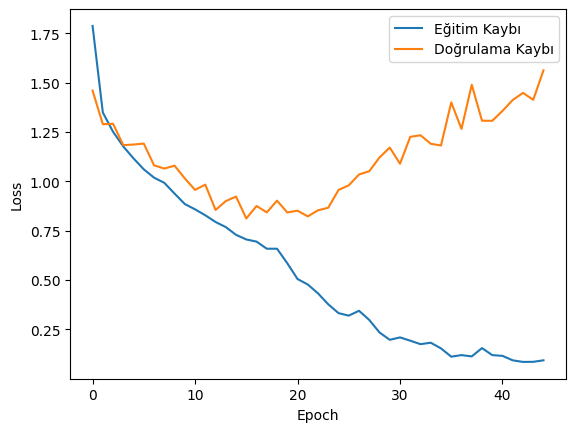

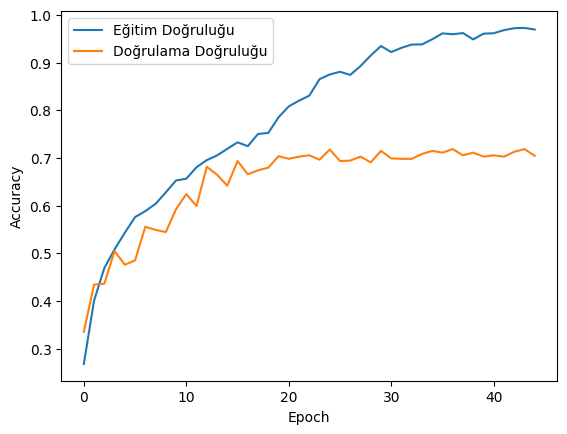

In [41]:
import matplotlib.pyplot as plt

# Eğitim ve Doğrulama Kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [42]:
loss,acc=model.evaluate(x_test,y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7061 - loss: 1.6052


In [43]:
acc

0.7046296000480652

In [53]:
predict=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


Text(0.5, 1.0, 'Confusion Matrix')

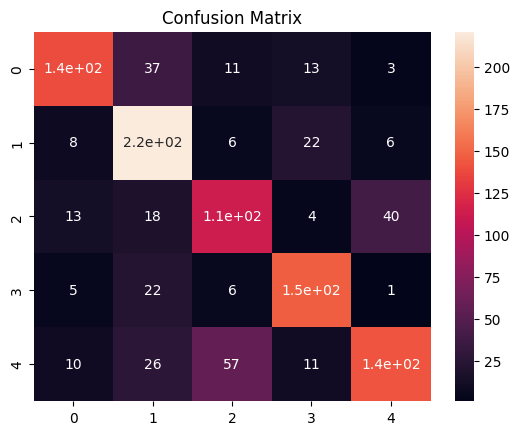

In [54]:
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix,classification_report
confusion_matrix(y_test,np.argmax(predict,axis=1))

sns.heatmap(confusion_matrix(y_test,np.argmax(predict,axis=1)),annot=True)
plt.title('Confusion Matrix')

In [55]:
print(classification_report(y_test,np.argmax(predict,axis=1)))

              precision    recall  f1-score   support

           0       0.79      0.68      0.74       203
           1       0.68      0.84      0.75       263
           2       0.58      0.60      0.59       187
           3       0.75      0.81      0.78       181
           4       0.74      0.58      0.65       246

    accuracy                           0.70      1080
   macro avg       0.71      0.70      0.70      1080
weighted avg       0.71      0.70      0.70      1080

